# Assignment 3, Q1, Q2, Q3 
Mandana Samiei
ID: 260779555

In [4]:
import numpy as np 
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt
import csv
import math
from numpy.linalg import inv
%matplotlib inline  
from io import StringIO
import string
import operator
import random 
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.svm import LinearSVC
def load_data(file_name):
    f = open(file_name, 'r')
    my_data= f.read()
    return my_data

def split_data(data):
    reviews, targets = [], []
    splitted_txt = data.rstrip('\n').split('\n')
    for i in range(len(splitted_txt)):
        line = splitted_txt[i].split('\t')
        reviews.append(line[0])
        targets.append(line[1])
    return reviews, targets

def pre_process(data):
    rvw = []
    for x in data: 
        rvw.append(x.translate(None, string.punctuation).lower())
    return rvw

def get_vocab(data):
    count = {}
    for x in data:
        rvw = x.split()
        for w in rvw:
            if w in count: 
                count[w] +=1;
            else:
                count[w] = 1;
    v = sorted(count.items(), key=operator.itemgetter(1), reverse=True) # list of vocabularies
    return v

def get_feature_set(vocabulary):
    f_set = []
    for i in range(10000):
        f_set.append(vocabulary[i][0])
    return f_set

# Save Vocabulary

In [47]:
def save_ylp_vocab(name, vocab):
    file = open("myfiles/"+name,"w")
    for i in range(10000):
        text = ""
        try:
            text += str(vocab[i][0])+ '\t'+ str(i+1) +'\t' +str(vocab[i][1])
           
        except ValueError:
            j=0
        text += '\n'
        file.write(text)

# Save dataset

In [44]:
def save_ylp_dataset(name,rvw,trg,f_set):
    file = open("myfiles/"+name,"w")
    for i in range(len(rvw)):
        words = np.array((rvw[i].split(' ')))
        text = ""
        for word in words:
            try:
                text += str(f_set.index(word)) + ' '
            except ValueError:
                j=0
        text  += '\t' + str(trg[i][0]) + '\n' 
        file.write(text)

# Binary bag-of-words representation

In [7]:
def bin_bow(rvw, f_set):
    new_dataset = np.zeros((len(rvw),len(f_set)))
    for i in range(len(rvw)):
        words = rvw[i].split()
        for w in words:
            try:
                new_dataset[i][f_set.index(w)] = 1;
            except ValueError:
                j=0
    return new_dataset

# Frequency bag-of-words representation

In [8]:
def frq_bow(rvw, f_set):
    new_dataset = np.zeros((len(rvw),len(f_set)))
    fbow = np.zeros((len(rvw),len(f_set)))
    for i in range(len(rvw)):
        words = rvw[i].split()
        for w in words:
            try:
                new_dataset[i][f_set.index(w)] += 1.0;
            except ValueError:
                j=0
        total = sum(new_dataset[i])
        if total != 0: #in case that no words exist in a review, review number #3615 is empty and causes NaN
            fbow[i] = new_dataset[i][:]/float(total)
        else: 
            fbow[i] = new_dataset[i][:]
    return fbow

In [8]:
#_____Frequecy Bag of Words______
#ylp_train_fbow = frq_bow(ylp_rvw_train, ylp_f_set)
#ylp_valid_fbow = frq_bow(ylp_rvw_valid, ylp_f_set)
#ylp_test_fbow  = frq_bow(ylp_rvw_test, ylp_f_set)

#print train_fbow[:10,:10]

# Q1

# Data Maniupulation

In [14]:
train_ylp  = load_data('hwk3_datasets/yelp-train.txt')
test_ylp   = load_data('hwk3_datasets/yelp-test.txt')
valid_ylp  = load_data('hwk3_datasets/yelp-valid.txt')
ylp_rvw_train, ylp_trg_train   = split_data(train_ylp)
ylp_rvw_valid, ylp_trg_valid   = split_data(valid_ylp)
ylp_rvw_test, ylp_trg_test     = split_data(test_ylp)

#_____PRE-PROCESSING___________
ylp_rvw_train = pre_process(ylp_rvw_train)
ylp_rvw_valid = pre_process(ylp_rvw_valid)
ylp_rvw_test = pre_process(ylp_rvw_test)

#_____CREATE VOCABLUARY________
ylp_v = get_vocab(ylp_rvw_train)
ylp_f_set = get_feature_set(ylp_v)

#_____Binary Bag of Words______
ylp_train_bbow = bin_bow(ylp_rvw_train, ylp_f_set)
ylp_valid_bbow = bin_bow(ylp_rvw_valid, ylp_f_set)
ylp_test_bbow  = bin_bow(ylp_rvw_test, ylp_f_set)
print "Binary Bag of words shape of Yelp training set:{}" .format(ylp_train_bbow.shape)


Binary Bag of words shape of Yelp training set:(7000, 10000)


# Save Vocabulary and datsets

In [20]:
save_ylp_dataset("yelp-train.txt",ylp_rvw_train,ylp_trg_train,ylp_f_set)
save_ylp_dataset("yelp-valid.txt",ylp_rvw_valid,ylp_trg_valid,ylp_f_set)
save_ylp_dataset("yelp-test.txt",ylp_rvw_test,ylp_trg_test,ylp_f_set)

In [48]:
save_ylp_vocab("yelp-vocab.txt", ylp_v)

# Random Classifier, Majority Classifier

In [11]:
def random_classifier(data):
    predictions = []
    for i in range(data.shape[0]):
        label = random.randint(1,5)
        predictions.append(label)
    return predictions
def majority_classifier(train_trg, test_trg):
    counts=[]
    train_trg = [ int(x) for x in train_trg ]
    for i in range(1,6):
        ci = train_trg.count(i)
        counts.append(ci)
    prediction = np.zeros(len(test_trg))+counts.index(max(counts))+1
    return prediction

In [37]:
prediction = random_classifier(ylp_test_bbow)
ylp_trg_tests = [ int(x) for x in ylp_trg_test ]
print "\nConfusion Matrix of Random Classifier:\n {}" .format(confusion_matrix(ylp_trg_tests, prediction))
f1 = f1_score(ylp_trg_tests, prediction, average='macro')
print "F1 measure of Random Classifier: {}" .format(f1)

prediction = majority_classifier(ylp_trg_train,ylp_trg_test)
ylp_trg_tests = [ int(x) for x in ylp_trg_test ]
print "\nConfusion Matrix of Majority-class Classifier:\n {}" .format(confusion_matrix(ylp_trg_tests, prediction))
f1 = f1_score(ylp_trg_tests, prediction, average='macro')
print "F1 measure of Majority-class Classifier: {}\n" .format(f1)

ylp_trg_train_a = np.asarray(ylp_trg_train)
ylp_trg_valid_a = np.asarray(ylp_trg_valid)
ylp_trg_test_a = np.asarray(ylp_trg_test)


Confusion Matrix of Random Classifier:
 [[ 26  24  24  36  33]
 [ 50  38  43  35  24]
 [ 59  62  57  65  57]
 [145 156 130 142 129]
 [125 138 130 131 141]]
F1 measure of Random Classifier: 0.182202038978

Confusion Matrix of Majority-class Classifier:
 [[  0   0   0 143   0]
 [  0   0   0 190   0]
 [  0   0   0 300   0]
 [  0   0   0 702   0]
 [  0   0   0 665   0]]
F1 measure of Majority-class Classifier: 0.103923019985



# Binary Bag of words: Bernoulli Naive Bayes'


_________________________________Bernoulli Naive Bayes_________________________________




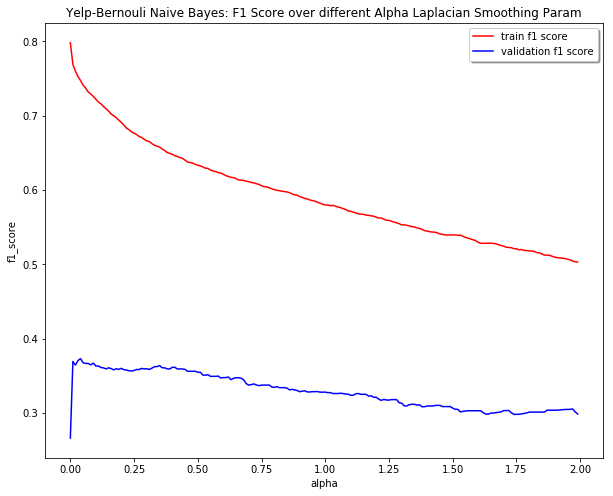


Train set: Maximum F1 score = 0.798360411795 by alpha=0.0

Validation set: Maximum F1 score = 0.373354042012 by alpha=0.04


In [40]:
print "\n_________________________________Bernoulli Naive Bayes_________________________________\n\n"
alpha = np.arange(0,2,0.01)
f1_list_tr, f1_list_v = [], []
for i in alpha:
    bnb = BernoulliNB(i,None,True)
    y_pred_valid = bnb.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
    y_pred_train = bnb.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
    f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
    f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
    f1_list_v.append(f1_v)
    f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(alpha, f1_list_tr, color='r', label="train f1 score")
plt.plot(alpha, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.title('Yelp-Bernouli Naive Bayes: F1 Score over different Alpha Laplacian Smoothing Param')
plt.show()   
print "\nTrain set: Maximum F1 score = {} by alpha={}" .format(max(f1_list_tr),alpha[f1_list_tr.index(max(f1_list_tr))])
print "\nValidation set: Maximum F1 score = {} by alpha={}" .format(max(f1_list_v),alpha[f1_list_v.index(max(f1_list_v))])

In [43]:
bnb = BernoulliNB(0.04,None,True)
y_pred_test = bnb.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\nTest set: Maximum F1 score = {} by alpha={}" .format(f1_ts,0.04)


Test set: Maximum F1 score = 0.385221910535 by alpha=0.04


In [66]:
bnb = BernoulliNB(0.04,None,True)
y_pred_train = bnb.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\nTrain set: Maximum F1 score = {} by alpha={}" .format(f1_tr,0.04)


Train set: Maximum F1 score = 0.747396116481 by alpha=0.04


# Binary Bag of words - Decision Tree

# criteria: Gini, find the best max depth


_____________________________________Decision Tree______________________________________



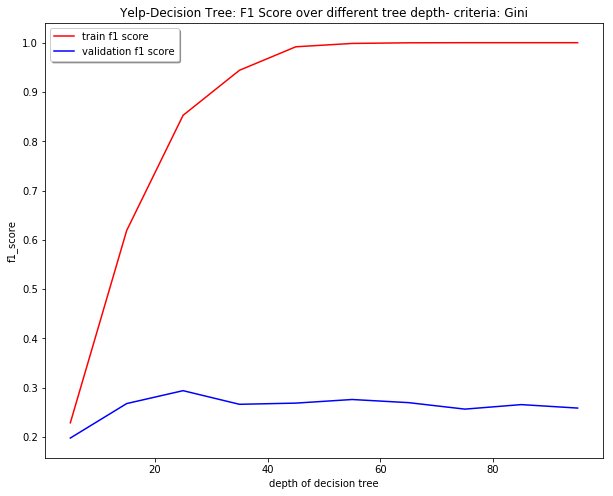


__Train set__Maximum F1 score =1.0 by depth=75

__Validation set__Maximum F1 score =0.293787133684 by depth=25


In [66]:
print "\n_____________________________________Decision Tree______________________________________\n"
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification 
#and regression. The goal is to create a mode that predicts the value of a target variable 
#by learning simple decision rules inferred from the data features.
f1_list_tr, f1_list_v = [], []
depth = np.arange(5,100,10)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different tree depth- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])


In [65]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini', max_depth=25).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_ts)


__Test set__Maximum F1 score =0.27427100026


In [85]:
 y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=25).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_tr)


__Test set__Maximum F1 score =0.851942484288


# criteria: Entropy, find the best max depth

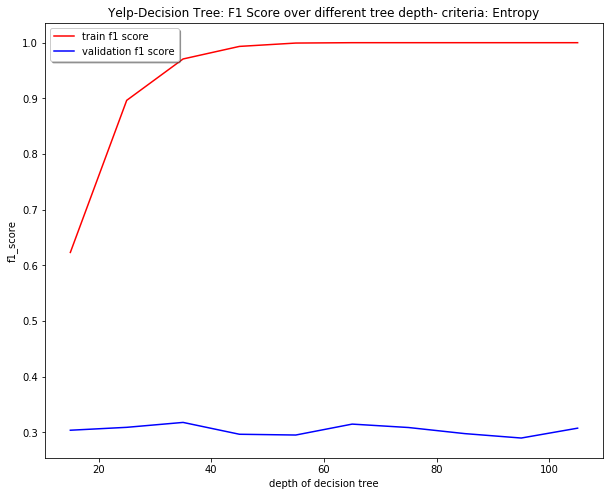


__Train set__Maximum F1 score =1.0 by depth=65

__Validation set__Maximum F1 score =0.31767538649 by depth=35


In [52]:
f1_list_tr, f1_list_v= [], []
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different tree depth- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])

In [53]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=35).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_ts)


__Test set__Maximum F1 score =0.289533247147


In [86]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=35).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_tr)


__Test set__Maximum F1 score =0.969632868365


# criteria: Gini, max_depth=25, find the best min_samples_leaf

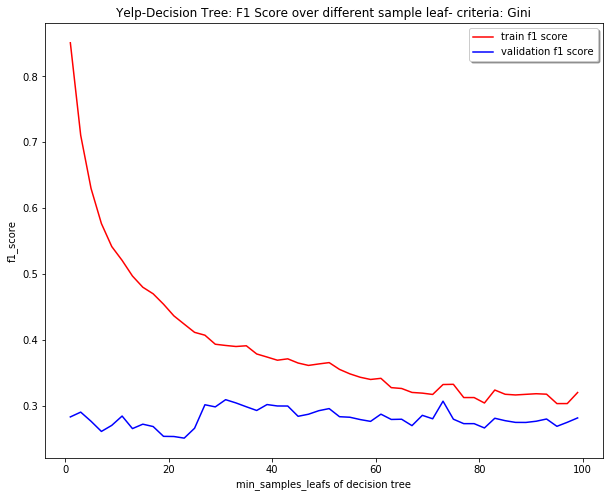


__Train set__Maximum F1 score =0.850865792078 by min_samples_leafs=1

__Validation set__Maximum F1 score =0.309882851801 by min_samples_leafs=31


In [62]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=25,min_samples_leaf=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=25,min_samples_leaf=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different sample leaf- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leafs={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [73]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini', max_depth=25,min_samples_leaf=31).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_ts)


__Test set__Maximum F1 score =0.295984356499


In [87]:
y_pred_train = tree.DecisionTreeClassifier(criterion='gini', max_depth=25,min_samples_leaf=31).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_tr)


__Test set__Maximum F1 score =0.392058433193


# criteria: Entropy, max_depth=35, find the best min_sample_leaf

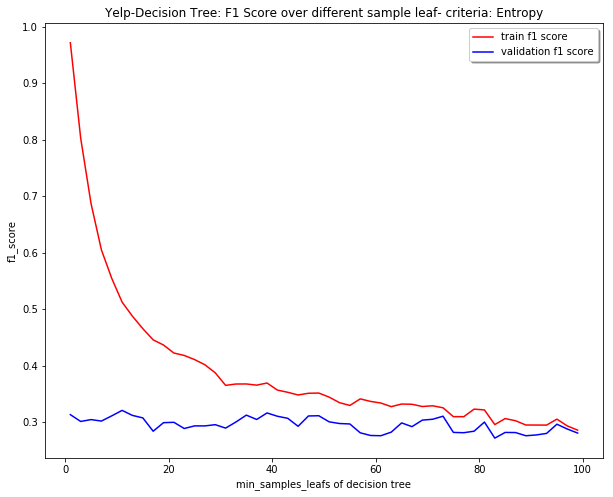


__Train set__Maximum F1 score =0.971397621996 by depth=1

__Validation set__Maximum F1 score =0.320746689169 by depth=11


In [67]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=35,min_samples_leaf=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=35,min_samples_leaf=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different sample leaf- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leaf={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leaf={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [72]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=11).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_ts)


__Test set__Maximum F1 score =0.276521834892


In [88]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=11).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Test set__best F1 score ={}" .format(f1_tr)


__Test set__best F1 score =0.512099859955


# criteria=Gini, max_depth=25, min_sample_leaf=31, find the best max_leaf_nodes

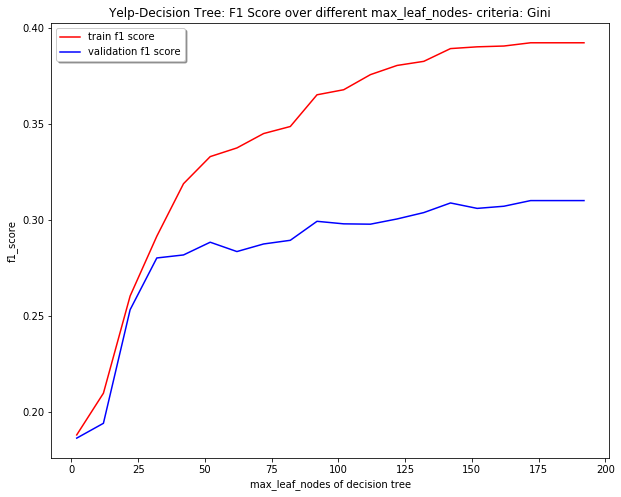


__Train set__Maximum F1 score =0.392058433193 by max_leaf_nodes=172

__Validation set__Maximum F1 score =0.309882851801 by max_leaf_nodes=172


In [90]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=25,min_samples_leaf=31,max_leaf_nodes=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=25,min_samples_leaf=31,max_leaf_nodes=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different max_leaf_nodes- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [43]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_leaf=31,max_leaf_nodes=172).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Best F1 score ={} with max_leaf_nodes={}" .format(f1_ts,172)


__Test set__Best F1 score =0.295984356499 with max_leaf_nodes=172


In [15]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini', max_depth=25, min_samples_leaf=31,max_leaf_nodes=172).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_ts = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__Best F1 score ={} with max_leaf_nodes={}" .format(f1_ts,172)

NameError: name 'y_pred_train' is not defined

# criteria=Entropy, max_depth=35, min_sample_leaf=11, find the best max_leaf_nodes

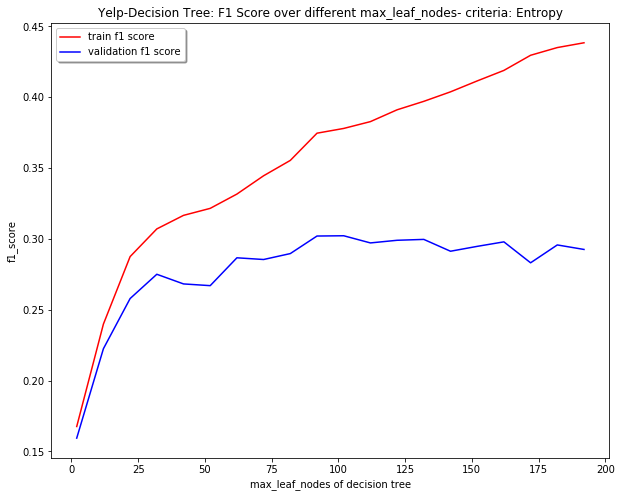


__Train set__Maximum F1 score =0.438431947959 by max_leaf_nodes=192

__Validation set__Maximum F1 score =0.302196408027 by max_leaf_nodes=102


In [44]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_=np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=35,min_samples_leaf=11,max_leaf_nodes=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=35,min_samples_leaf=11,max_leaf_nodes=i).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Decision Tree: F1 Score over different max_leaf_nodes- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [62]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=11, max_leaf_nodes=102).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={} criteria: Entropy, max_depth={}, min_sample_leaf={}, max_leaf_nodes={}" .format(f1_ts,35,11,102)


__Test set__Maximum F1 score =0.275910008696 criteria: Entropy, max_depth=35, min_sample_leaf=11, max_leaf_nodes=102


In [18]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=35, min_samples_leaf=11, max_leaf_nodes=102).fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__Maximum F1 score ={} criteria: Entropy, max_depth={}, min_sample_leaf={}, max_leaf_nodes={}" .format(f1_tr,35,11,102)


__Train set__Maximum F1 score =0.377960289377 criteria: Entropy, max_depth=35, min_sample_leaf=11, max_leaf_nodes=102


# Binary Bag of words - SVM


______________________________Support Vector Machine (SVM)______________________________



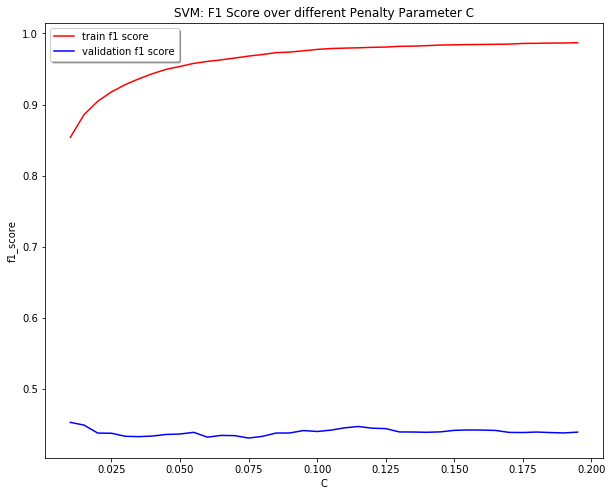


__Train set__Maximum F1 score =0.986925637104 by C=0.195

__Validation set__Maximum F1 score =0.453039857496 by C=0.01


In [89]:
print "\n______________________________Support Vector Machine (SVM)______________________________\n"
#Yelp: 7000*1000 Number of features are greater than number of examples --> Dual Problem 
f1_list_tr, f1_list_v, f1_list_ts = [], [], []
#class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, 
#fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
c_ = np.arange(0.01, 0.2, 0.005)
for c in c_:
    svc = LinearSVC(C=c)
    y_pred_train = svc.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
    y_pred_valid = svc.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_valid_bbow)
    f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
    f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
    f1_list_v.append(f1_v)
    f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(c_, f1_list_tr, color='r', label="train f1 score")
plt.plot(c_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('C')
plt.ylabel('f1_score')
plt.title('SVM: F1 Score over different Penalty Parameter C')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by C={}" .format(max(f1_list_tr),c_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by C={}" .format(max(f1_list_v),c_[f1_list_v.index(max(f1_list_v))])

In [93]:
svc = LinearSVC(C=0.01)
y_pred_test = svc.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_test_bbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={} by C={}" .format(f1_ts,0.01)


__Test set__Maximum F1 score =0.461663324968 by C=0.01


In [94]:
svc = LinearSVC(C=0.01)
y_pred_train = svc.fit(ylp_train_bbow, ylp_trg_train).predict(ylp_train_bbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__best F1 score ={} by C={}" .format(f1_tr,0.01)


__Train set__best F1 score =0.853803311465 by C=0.01


# Q2- Yelp: Frequency Bag of words representation

In [10]:
#_____Frequecy Bag of Words______
ylp_train_fbow = frq_bow(ylp_rvw_train, ylp_f_set)
ylp_valid_fbow = frq_bow(ylp_rvw_valid, ylp_f_set)
ylp_test_fbow  = frq_bow(ylp_rvw_test, ylp_f_set)
print ylp_train_fbow.shape
print ylp_valid_fbow.shape
print ylp_test_fbow.shape

(7000, 10000)
(1000, 10000)
(2000, 10000)


# Frequency Bag of Words: Gaussian Naive Bayes

In [57]:
print "\n_______________________Gaussian Naive Bayes for Frequency Bag of Words_________________________\n"
gnb = GaussianNB()
y_pred_train = gnb.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
y_pred_valid = gnb.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
y_pred_test = gnb.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\nTrain set: Maximum F1 score = {}" .format(f1_tr)
print "\nValidation set: Maximum F1 score = {}" .format(f1_v)
print "\nTest set: Maximum F1 score = {}" .format(f1_ts)


_______________________Gaussian Naive Bayes for Frequency Bag of Words_________________________


Train set: Maximum F1 score = 0.785827048797

Validation set: Maximum F1 score = 0.244660263781

Test set: Maximum F1 score = 0.254895792069


# Frequency Bag of Words: Decision Tree

# criteria: Gini, find the best max depth


_____________________________________Decision Tree______________________________________



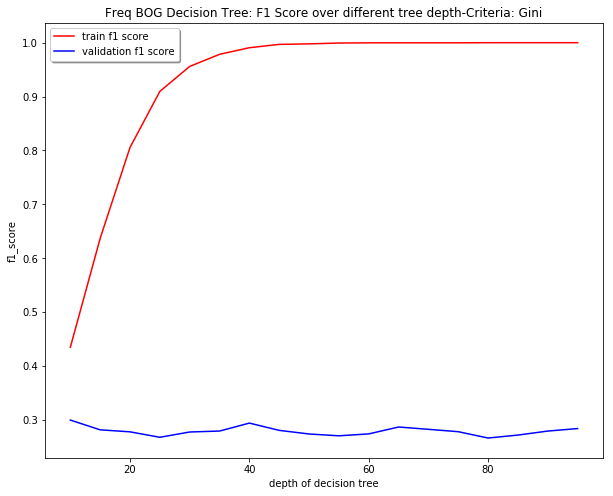


__Train set__Maximum F1 score =1.0 by depth=80

__Validation set__Maximum F1 score =0.299924806125 by depth=10


In [32]:
print "\n_____________________________________Decision Tree______________________________________\n"
f1_list_tr, f1_list_v = [], []
depth = np.arange(10,100,5)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('Freq BOG Decision Tree: F1 Score over different tree depth-Criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])

In [49]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini',max_depth=10).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__best F1 score ={}" .format(f1_ts)


__Test set__best F1 score =0.267768590963


In [19]:
y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=10).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__best F1 score ={}" .format(f1_tr)


__Train set__best F1 score =0.43537430174


# criteria: Entropy, find the best max depth


_____________________________________Decision Tree______________________________________



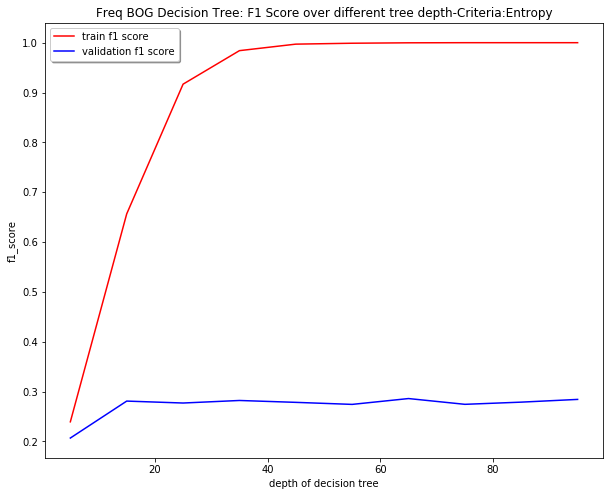


__Train set__Maximum F1 score =1.0 by depth=75

__Validation set__Maximum F1 score =0.285982945 by depth=65


In [31]:
print "\n_____________________________________Decision Tree______________________________________\n"
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification 
#and regression. The goal is to create a mode that predicts the value of a target variable 
#by learning simple decision rules inferred from the data features.
f1_list_tr, f1_list_v = [], []
depth = np.arange(5,100,10)
for i in depth:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(depth, f1_list_tr, color='r', label="train f1 score")
plt.plot(depth, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('depth of decision tree')
plt.ylabel('f1_score')
plt.title('Freq BOG Decision Tree: F1 Score over different tree depth-Criteria:Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by depth={}" .format(max(f1_list_tr),depth[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by depth={}" .format(max(f1_list_v),depth[f1_list_v.index(max(f1_list_v))])

In [33]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy',max_depth=65).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__F1 score ={}" .format(f1_ts)


__Test set__F1 score =0.301008561307


In [34]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=65).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__best F1 score ={}" .format(f1_tr)


__Train set__best F1 score =0.999766095815


# criteria: Gini, max_depth=10, find the best min_sample_leaf

/home/mandana/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


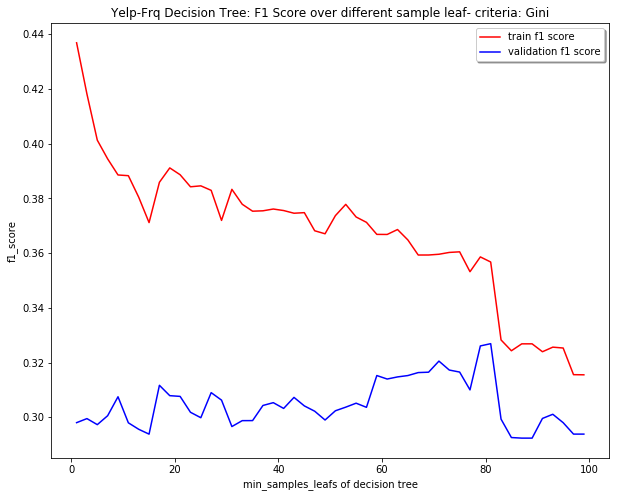


__Train set__Maximum F1 score =0.436839681805 by min_samples_leaf=1

__Validation set__Maximum F1 score =0.326885557701 by min_samples_leaf=81


In [29]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Frq Decision Tree: F1 Score over different sample leaf- criteria: Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leaf={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leaf={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [53]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_leaf=81).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Maximum F1 score ={}" .format(f1_ts)


__Test set__Maximum F1 score =0.285983288876


In [21]:
y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=81).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__best F1 score ={}" .format(f1_tr)


__Train set__best F1 score =0.356726062557


# criteria: Entropy, max_depth=65, find the best min_sample_leaf

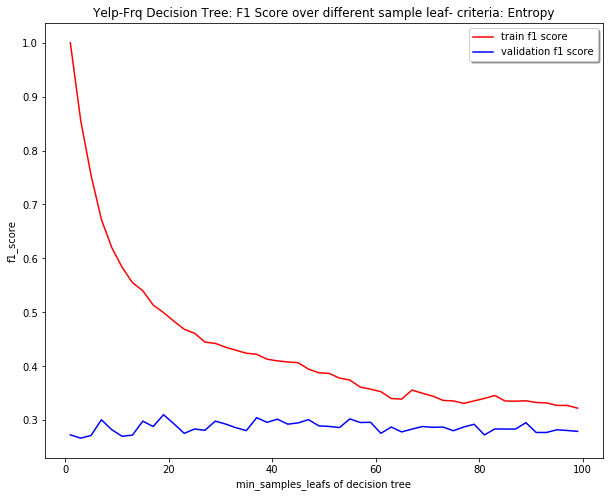


__Train set__Maximum F1 score =0.999766095815 by min_samples_leaf=1

__Validation set__Maximum F1 score =0.310286351813 by min_samples_leaf=19


In [35]:
f1_list_tr, f1_list_v = [], []
min_samples_leafs=np.arange(1,100,2)
for i in min_samples_leafs:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=65,min_samples_leaf=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=65,min_samples_leaf=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(min_samples_leafs, f1_list_tr, color='r', label="train f1 score")
plt.plot(min_samples_leafs, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('min_samples_leafs of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Frq Decision Tree: F1 Score over different sample leaf- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by min_samples_leaf={}" .format(max(f1_list_tr),min_samples_leafs[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by min_samples_leaf={}" .format(max(f1_list_v),min_samples_leafs[f1_list_v.index(max(f1_list_v))])

In [36]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=65, min_samples_leaf=19).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Best F1 score ={} with min_samples_leaf={}" .format(f1_ts,19)


__Test set__Best F1 score =0.299815850055 with min_samples_leaf=19


In [37]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=65, min_samples_leaf=19).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Test set__Best F1 score ={} with min_samples_leaf={}" .format(f1_tr,19)


__Test set__Best F1 score =0.499598115023 with min_samples_leaf=19


# criteria: Gini, max_depth=10, min_sample_leaf=81 , find the best max_leaf_nodes

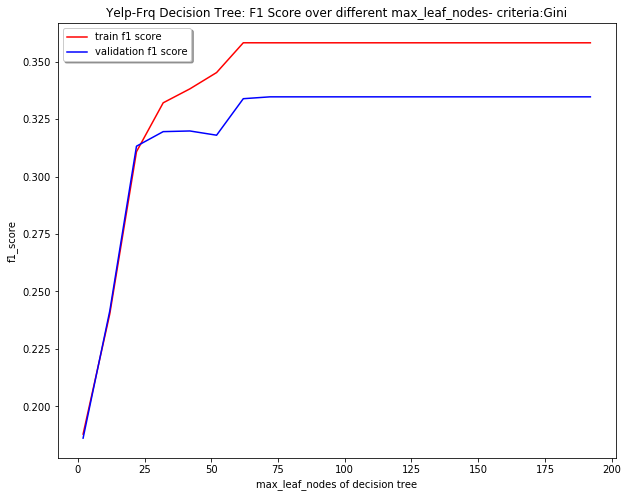


__Train set__Maximum F1 score =0.358204954684 by max_leaf_nodes=62

__Validation set__Maximum F1 score =0.334681714619 by max_leaf_nodes=72


In [57]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=81,max_leaf_nodes=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=81,max_leaf_nodes=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Frq Decision Tree: F1 Score over different max_leaf_nodes- criteria:Gini')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [60]:
y_pred_test = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=81,max_leaf_nodes=72).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Best F1 score ={} with max_leaf_nodes={}" .format(f1_ts,72)


__Test set__Best F1 score =0.287384219859 with max_leaf_nodes=72


In [25]:
y_pred_train= tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=81,max_leaf_nodes=72).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__Best F1 score ={} with max_leaf_nodes={}" .format(f1_tr,72)


__Train set__Best F1 score =0.358194634116 with max_leaf_nodes=72


# criteria: Entropy, max_depth=65, min_sample_leaf=19 , find the best max_leaf_nodes

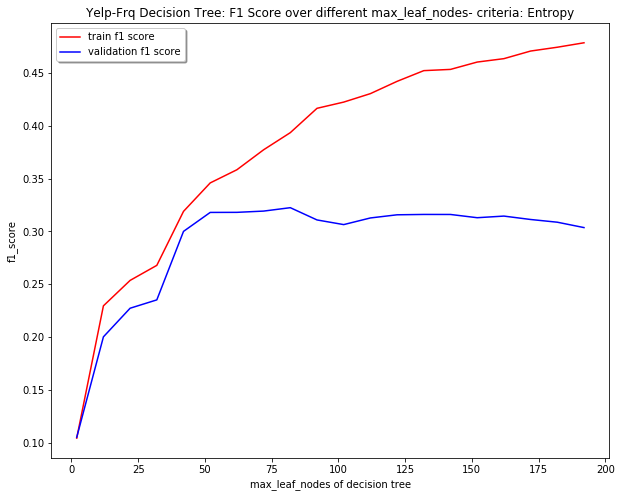


__Train set__Maximum F1 score =0.478598244284 by max_leaf_nodes=192

__Validation set__Maximum F1 score =0.32245995998 by max_leaf_nodes=82


In [38]:
f1_list_tr, f1_list_v = [], []
max_leaf_nodes_= np.arange(2,200,10)
for i in max_leaf_nodes_:
        y_pred_train = tree.DecisionTreeClassifier(criterion='entropy',max_depth=65,min_samples_leaf=19,max_leaf_nodes=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
        y_pred_valid = tree.DecisionTreeClassifier(criterion='entropy',max_depth=65,min_samples_leaf=19,max_leaf_nodes=i).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
        f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
        f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
        f1_list_v.append(f1_v)
        f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(max_leaf_nodes_, f1_list_tr, color='r', label="train f1 score")
plt.plot(max_leaf_nodes_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('max_leaf_nodes of decision tree')
plt.ylabel('f1_score')
plt.title('Yelp-Frq Decision Tree: F1 Score over different max_leaf_nodes- criteria: Entropy')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_tr),max_leaf_nodes_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by max_leaf_nodes={}" .format(max(f1_list_v),max_leaf_nodes_[f1_list_v.index(max(f1_list_v))])

In [43]:
y_pred_test = tree.DecisionTreeClassifier(criterion='entropy', max_depth=65, min_samples_leaf=19,max_leaf_nodes=82).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set__Best F1 score ={} with criterion='entropy', max_depth=65, min_samples_leaf=19, mmax_leaf_nodes={}" .format(f1_ts,82)


__Test set__Best F1 score =0.298799903353 with criterion='entropy', max_depth=65, min_samples_leaf=19, mmax_leaf_nodes=82


In [42]:
y_pred_train = tree.DecisionTreeClassifier(criterion='entropy', max_depth=65, min_samples_leaf=19,max_leaf_nodes=82).fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set__Best F1 score ={} with criterion='entropy', max_depth=65, min_samples_leaf=19, mmax_leaf_nodes={}" .format(f1_tr,82)


__Train set__Best F1 score =0.393509869069 with criterion='entropy', max_depth=65, min_samples_leaf=19, mmax_leaf_nodes=82


# Frequency Bag of Words: SVM


______________________________Support Vector Machine (SVM)______________________________



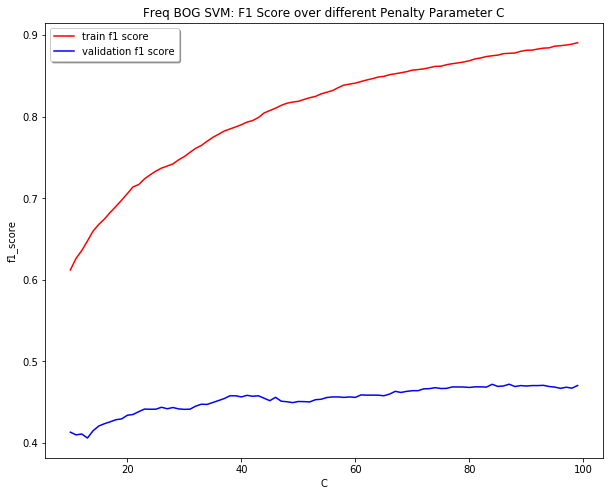


__Train set__Maximum F1 score =0.890796005569 by C=99

__Validation set__Maximum F1 score =0.472091184934 by C=87


In [52]:
print "\n______________________________Support Vector Machine (SVM)______________________________\n"
#Yelp: 7000*1000 Number of features are greater than number of examples --> Dual Problem 
f1_list_tr, f1_list_v, f1_list_ts = [], [], []
c_ = np.arange(10, 100, 1)
for c in c_:
    svc = LinearSVC(C=c)
    y_pred_train = svc.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
    y_pred_valid = svc.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_valid_fbow)
    f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
    f1_v = f1_score(ylp_trg_valid, y_pred_valid, average='macro')
    f1_list_v.append(f1_v)
    f1_list_tr.append(f1_tr)
ax, fig = plt.subplots(0,figsize=(10,8))
plt.plot(c_, f1_list_tr, color='r', label="train f1 score")
plt.plot(c_, f1_list_v, color='b', label="validation f1 score")
plt.legend(loc='best', shadow=True)
plt.xlabel('C')
plt.ylabel('f1_score')
plt.title('Freq BOG SVM: F1 Score over different Penalty Parameter C')
plt.show()   
print "\n__Train set__Maximum F1 score ={} by C={}" .format(max(f1_list_tr),c_[f1_list_tr.index(max(f1_list_tr))])
print "\n__Validation set__Maximum F1 score ={} by C={}" .format(max(f1_list_v),c_[f1_list_v.index(max(f1_list_v))])

In [58]:
svc = LinearSVC(C=87)
y_pred_test = svc.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_test_fbow)
f1_ts = f1_score(ylp_trg_test, y_pred_test, average='macro')
print "\n__Test set_ best F1 score ={}" .format(f1_ts) 


__Test set_ best F1 score =0.461221145438


In [28]:
svc = LinearSVC(C=87)
y_pred_train = svc.fit(ylp_train_fbow, ylp_trg_train).predict(ylp_train_fbow)
f1_tr = f1_score(ylp_trg_train, y_pred_train, average='macro')
print "\n__Train set_ best F1 score ={}" .format(f1_tr) 


__Train set_ best F1 score =0.877231072306
